In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


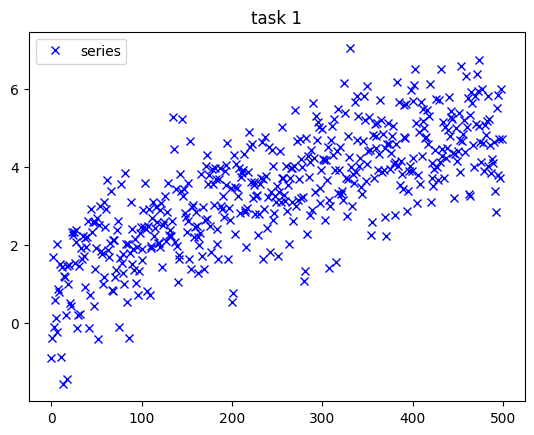

In [2]:
#task 1
N = 500
h = 0.05

def model_series():
    return np.array([np.sqrt(k*h) + np.random.normal() for k in range(N)])
def model_trend_series():
    return np.array([np.sqrt(k*h) for k in range(N)])

series = model_series()

plt.figure()
plt.title("task 1")
plt.plot(series,'x', color = 'blue', label = "series",)
plt.legend()
plt.show()

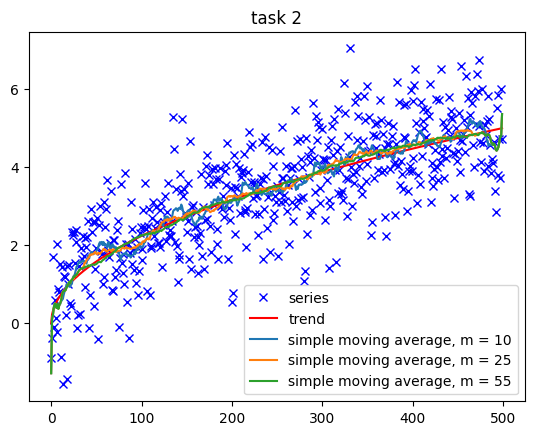

In [3]:
#task 2
def simple_moving_average(series:np.array, m:int):
    res = []
    for i in range(series.size):
        if i < m:
            res.append(sum([series[j] for j in range(0, 2 * i + 2)]) / (2.0 * i + 1))
        elif i >= series.size - m - 1 :
            res.append(sum([series[j] for j in range(i - (series.size - i), series.size)]) / len(range(i - (series.size - i), series.size)))
        else:
            res.append(sum(series[j] for j in range(i - m, i + m + 1)) / (2.0 * m + 1))
    return res

trend = model_trend_series()

ma_10 = simple_moving_average(series, 10)
ma_25 = simple_moving_average(series, 25)
ma_55 = simple_moving_average(series, 55)

plt.figure()
plt.title("task 2")
plt.plot(series, 'x', color = 'blue', label = "series")
plt.plot(trend,color ='red', label = "trend")
plt.plot(ma_10, label = "simple moving average, m = 10")
plt.plot(ma_25, label = "simple moving average, m = 25")
plt.plot(ma_55, label = "simple moving average, m = 55")
plt.legend()

plt.legend()
plt.show()

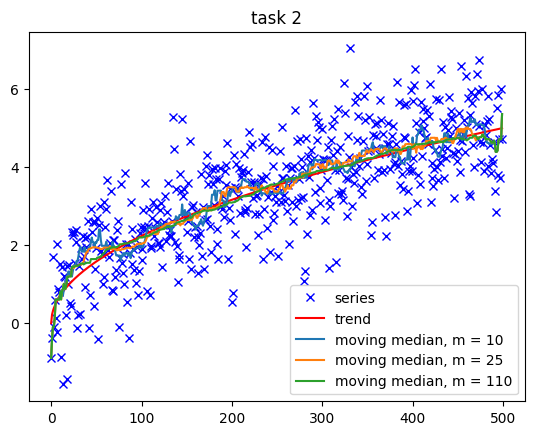

In [4]:
#task 3
def moving_median(series:np.array, m:int):
    res = []
    for i in range(series.size):
        if i < m:
            res.append(np.median(series[0:2*i + 1]))
        elif i > series.size - m - 1:
            res.append(np.median(series[i - (series.size - i):series.size]))
        else:
            res.append(np.median(series[i-m:i+m]))
    return res    

trend = model_trend_series()

moving_median_10 = moving_median(series, 10)
moving_median_25 = moving_median(series, 25)
moving_median_110 = moving_median(series, 110)

plt.figure()
plt.title("task 2")
plt.plot(series, 'x', color = 'blue', label = "series")
plt.plot(trend,color ='red', label = "trend")
plt.plot(moving_median_10, label = "moving median, m = 10")
plt.plot(moving_median_25, label = "moving median, m = 25")
plt.plot(moving_median_110, label = "moving median, m = 110")
plt.legend()

plt.legend()
plt.show()

In [5]:
#task 4
def rotation_points(series:np.array):
    res = []
    for i in range(1, len(series) - 2):
        if (series[i] > series[i - 1] and series[i] > series[i + 1]) or (series[i] < series[i - 1] and series[i] < series[i + 1]):
            res.append(series[i])
    return res


def kendall(series:np.array, trend:np.array):
    tail = series - trend
    r_p = rotation_points(trend)
    p_e = (2.0 / 3.0) * (len(series) - 2)
    p_d = (16 * len(series) - 29) / 90.0
    p_c = len(r_p)
    
    print('rotation points count: ', p_c)
    print('Kendall coefficient: ', (4 * p_c) / (N * (N - 1)) - 1)

    if p_c < p_e + p_d and p_c > p_e - p_d:
        print("random\n")
    elif p_c > p_e + p_d:
        print("rapidly oscillating\n")
    elif p_c < p_e - p_d:
        print("positively correlated\n")

print("kendall for moving average (10)")
kendall(series, ma_10)
print("kendall for moving average (25)")
kendall(series, ma_25)
print("kendall for moving average (55)")
kendall(series, ma_55)
print("kendall for moving median (10)")
kendall(series, moving_median_10)
print("kendall for moving median (25)")
kendall(series, moving_median_25)
print("kendall for moving median (110)")
kendall(series, moving_median_110)


kendall for moving average (10)
rotation points count:  231
Kendall coefficient:  -0.9962965931863728
positively correlated

kendall for moving average (25)
rotation points count:  231
Kendall coefficient:  -0.9962965931863728
positively correlated

kendall for moving average (55)
rotation points count:  185
Kendall coefficient:  -0.9970340681362726
positively correlated

kendall for moving median (10)
rotation points count:  71
Kendall coefficient:  -0.9988617234468938
positively correlated

kendall for moving median (25)
rotation points count:  60
Kendall coefficient:  -0.9990380761523046
positively correlated

kendall for moving median (110)
rotation points count:  26
Kendall coefficient:  -0.9995831663326653
positively correlated

